In [1]:
import numpy as np 
import pandas as pd
import os
import glob
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import plotly.express as px
import folium
from folium import plugins
import branca
import json
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import matplotlib.pylab as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

pio.renderers.default = "notebook_connected"

import os
os.getcwd()
os.chdir("C:/Users/JYW/Desktop/Github/Data-Science-for-COVID-19")

In [2]:
files = glob.glob('dataset/*.csv')
data = []
for i in files :
    i = re.sub("dataset\\\\", "", i)
    data.append(re.sub(".csv","",i))
for i in range(len(files)) :
    globals()[data[i]] = pd.read_csv(files[i])
data

['Case',
 'Latitude',
 'Longitude',
 'PatientInfo',
 'PatientRoute',
 'Region',
 'SearchTrend',
 'Time',
 'TimeAge',
 'TimeGender',
 'TimeProvince',
 'Weather']

In [3]:
korea = gpd.read_file("total")
korea.head(3)

,CTPRVN_CD,CTP_ENG_NM,SIG_CD,SIG_ENG_NM,geometry
0,11,Seoul,11110,Jongno-gu,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11,Seoul,11140,Jung-gu,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11,Seoul,11170,Yongsan-gu,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."


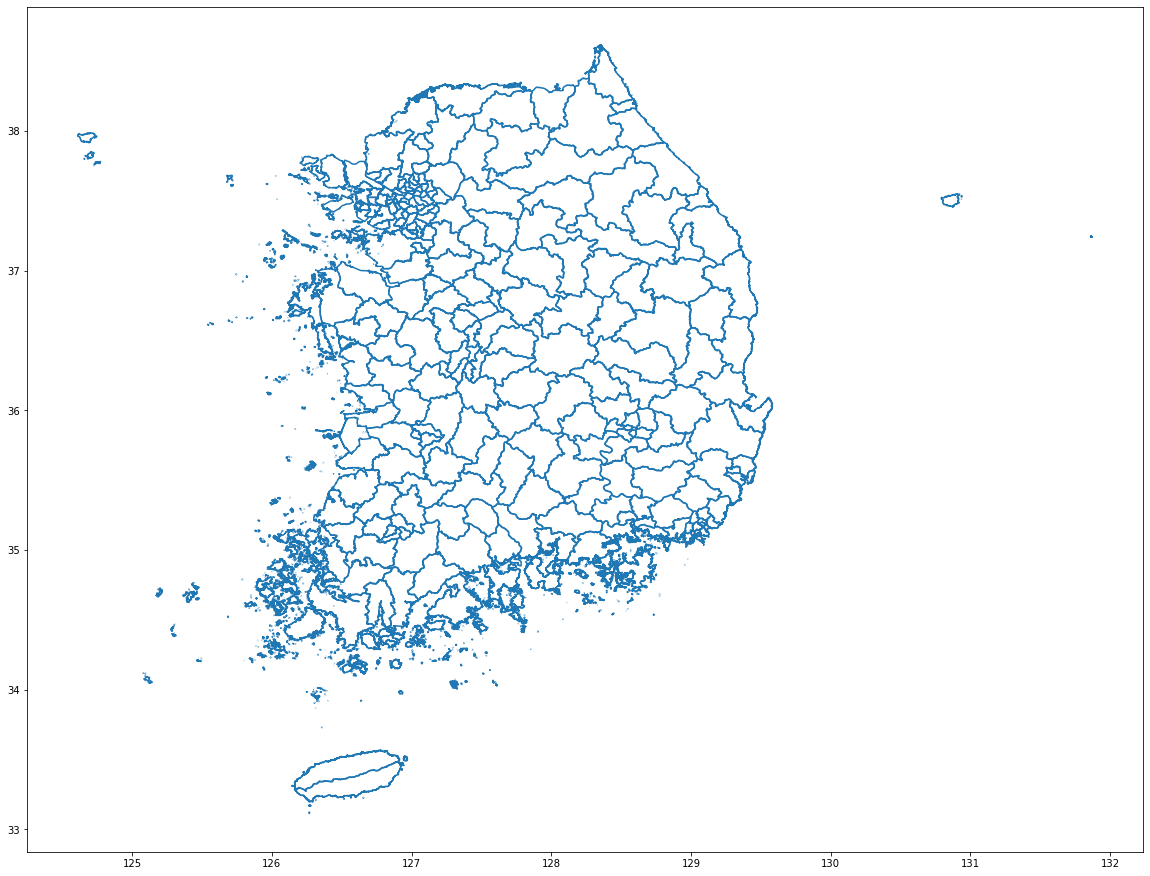

In [4]:
korea.boundary.plot(figsize=(20,20))

한국 지도 데이터 그리기 완성~ 이제 region정보를 불러와보자!

In [5]:
Region
Region_geo = gpd.GeoDataFrame(Region,geometry=gpd.points_from_xy(Region.longitude,Region.latitude))
Region_geo.head(3)

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,geometry
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739,POINT (126.97798 37.56695)
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,POINT (127.04722 37.51842)
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,POINT (127.12384 37.53049)


Region정보도 geopandas로 바꿨으니 지도로 그려보자~

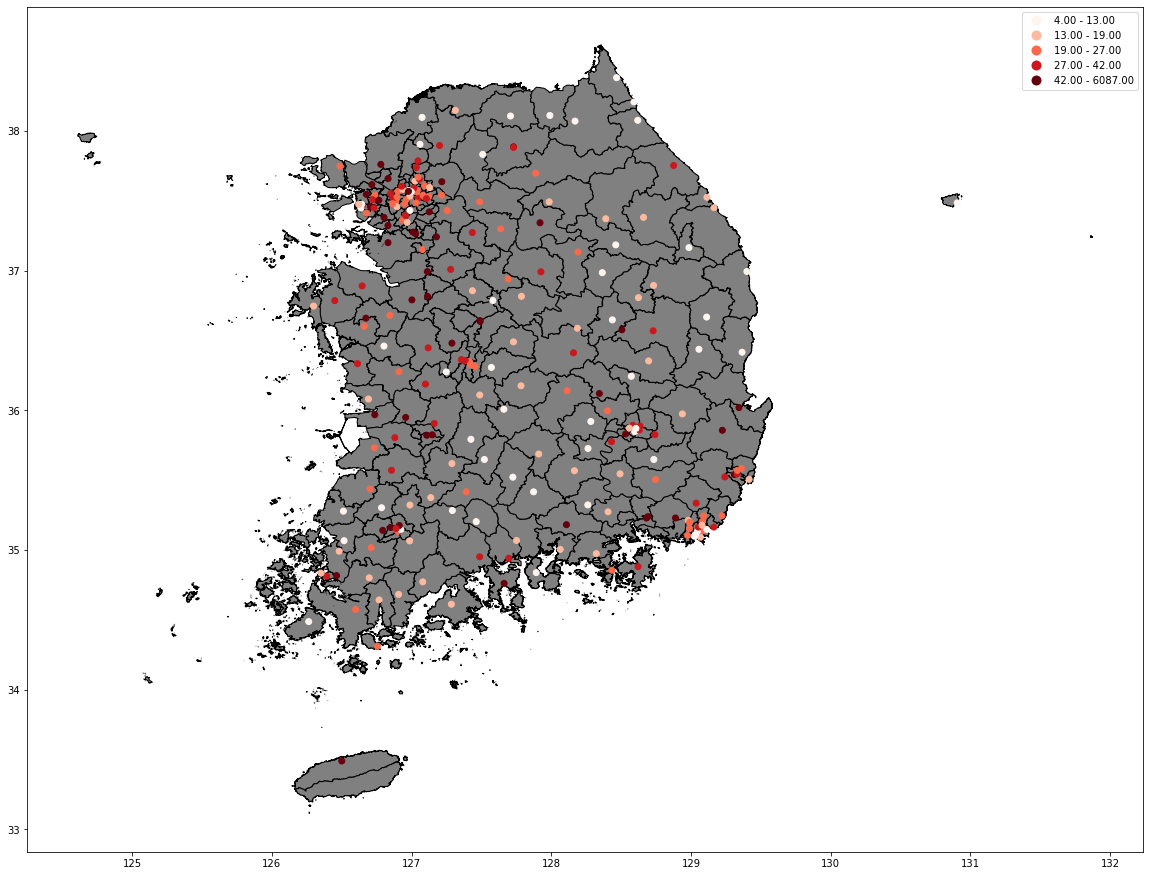

In [6]:
import mapclassify 


base = korea.plot(color = 'grey', edgecolor= 'black',figsize=(20,20))
Region_geo.plot(ax=base, column='elementary_school_count', legend=True,cmap="Reds", k=5, scheme='QUANTILES')

음 점이 아니고 면적으로 표현하고 싶다~ merge를 해볼까?

In [7]:
Region_geo.rename(columns = {'province' : 'CTP_ENG_NM', 'city' : 'SIG_ENG_NM'}, inplace = True)

merge = pd.merge(korea, Region_geo.iloc[:,1:Region_geo.shape[1]-1], how='left', on=['CTP_ENG_NM','SIG_ENG_NM'])
merge.head(3)

,CTPRVN_CD,CTP_ENG_NM,SIG_CD,SIG_ENG_NM,geometry,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,11,Seoul,11110,Jongno-gu,"POLYGON ((127.00864 37.58047, 127.00871 37.580...",37.572999,126.979189,13.0,17.0,3.0,1.71,18.27,6.8,668.0
1,11,Seoul,11140,Jung-gu,"POLYGON ((127.02314 37.57196, 127.02336 37.571...",37.563988,126.997530,12.0,14.0,2.0,0.94,18.42,7.4,728.0
2,11,Seoul,11170,Yongsan-gu,"POLYGON ((126.96918 37.55566, 126.96917 37.554...",37.532768,126.990021,15.0,13.0,1.0,0.68,16.87,6.5,435.0


이제 그려보자~

1. Elementary school count

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in greater

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in less_equal



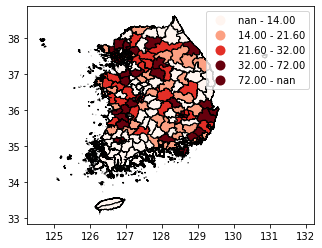

In [9]:
merge.plot(column='elementary_school_count', legend=True, cmap="Reds",edgecolor="black", scheme='QUANTILES')

2. Kindergarten count

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in greater

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in less_equal



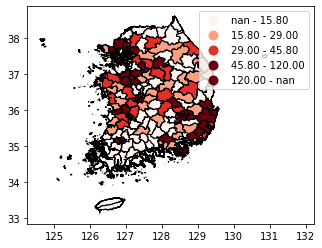

In [10]:
merge.plot(column='kindergarten_count', legend=True, cmap="Reds",edgecolor="black", scheme='QUANTILES')

3. University count

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in greater

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in less_equal



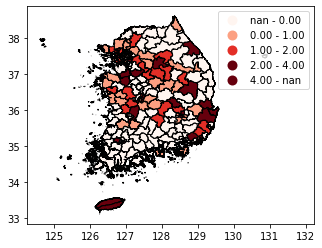

In [16]:
merge.plot(column='university_count', legend=True, cmap="Reds",edgecolor="black", scheme='QUANTILES')

4. Academy ratio

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in greater

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in less_equal



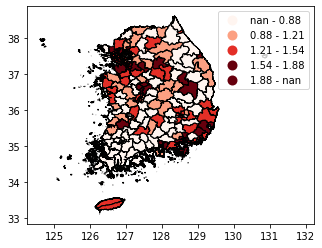

In [15]:
merge.plot(column='academy_ratio', legend=True, cmap="Reds",edgecolor="black", scheme='QUANTILES')

5. Elderly population ratio

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in greater

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in less_equal



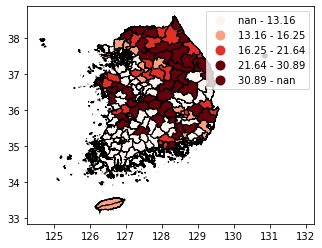

In [17]:
merge.plot(column='elderly_population_ratio', legend=True, cmap="Reds",edgecolor="black", scheme='QUANTILES')

6. Elderly alone ratio

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in greater

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in less_equal



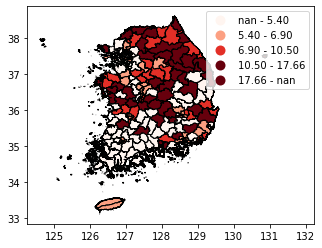

In [18]:
merge.plot(column='elderly_alone_ratio', legend=True, cmap="Reds",edgecolor="black", scheme='QUANTILES')

7. Nursing home count

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in greater

C:\Users\JYW\Anaconda3\lib\site-packages\mapclassify\classifiers.py:419: RuntimeWarning:

invalid value encountered in less_equal



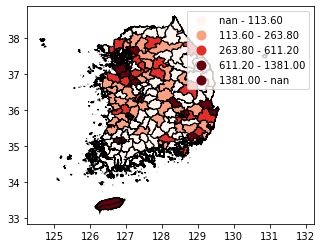

In [19]:
merge.plot(column='nursing_home_count', legend=True, cmap="Reds",edgecolor="black", scheme='QUANTILES')

Elderly 관련 변수들 빼면 대부분 수도권, 경상권 집중 양상 비슷